### Classification in Business

<center>
    <img src = 'images/uci_biz.png' />
</center>



------------


For this try-it, you are to explore some available datasets related to business applications of classification.  Using a dataset from the UCI Machine Learning Repository, scan datasets   under the subject area "BUSINESS" [link here](https://archive.ics.uci.edu/ml/datasets.php?format=&task=cla&att=&area=bus&numAtt=&numIns=&type=&sort=nameUp&view=table).  Find a dataset that looks interesting to you and decide how you could use Logistic Regression to help make a business decision using the data. 

In sharing your results, be sure to clearly describe the following:

- the dataset and its features
- the classification problem -- what are you classifying here?
- a business decision that can be supported using the results of the classification model

Share your summary on the appropriate discussion board for the activity. 

In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [60]:
red_wine_data = pd.read_excel('data/wine_1.xlsx')
white_wine_data = pd.read_excel('data/wine_2.xlsx')

In [61]:
red_wine_data['wine_type'] = 'Red'
white_wine_data['wine_type'] = 'White'

# Concatenate (combine) the two datasets vertically
combined_wine_data = pd.concat([red_wine_data, white_wine_data], ignore_index=True)


In [62]:
combined_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red


In [63]:
combined_wine_data.shape

(6497, 13)

In [64]:
combined_wine_data = combined_wine_data.dropna()

In [65]:
combined_wine_data.shape

(6497, 13)

In [66]:
combined_wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        43
           5       0.31      0.81      0.45       402
           6       0.00      0.00      0.00       597
           7       0.25      0.00      0.01       215
           8       0.03      0.03      0.03        36
           9       0.00      0.00      0.00         1

    accuracy                           0.25      1300
   macro avg       0.08      0.12      0.07      1300
weighted avg       0.14      0.25      0.14      1300



/Applications/Anaconda/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Applications/Anaconda/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/Anaconda/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/Anaconda/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F

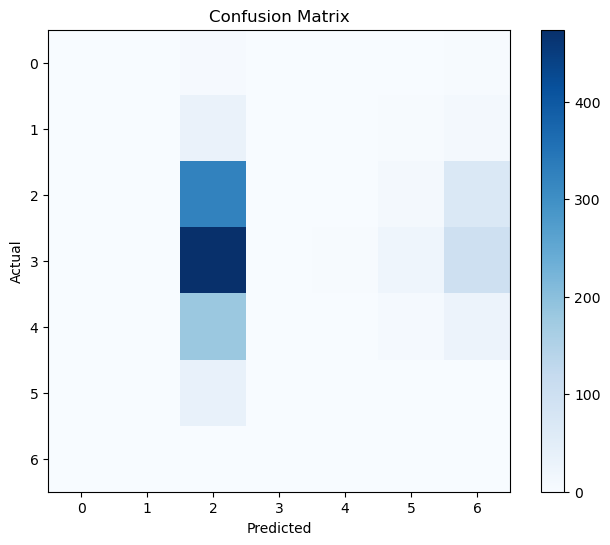

In [67]:
# Convert "wine_type" to categorical values using one-hot encoding
combined_wine_data = pd.get_dummies(combined_wine_data, columns=['wine_type'], drop_first=True)

# Define independent variables (features) and the target variable
X = combined_wine_data.drop(columns=['quality'])
y = combined_wine_data['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train a logistic regression model on scaled data
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)


# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division='warn'))

# Plot a confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate ROC-AUC score and plot ROC curve (for binary classification)
if len(set(y)) == 2:
    y_prob = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_prob)
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()


In [69]:
from sklearn.model_selection import GridSearchCV, cross_val_score

# Define hyperparameter grid for Logistic Regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'max_iter': [100, 500, 1000],         # Maximum number of iterations
}

# Create a logistic regression model
logistic_model = LogisticRegression()

# Create GridSearchCV object with cross-validation
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best estimator from the grid search
best_logistic_model = grid_search.best_estimator_

# Cross-validate the best model
cv_scores = cross_val_score(best_logistic_model, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Print the best hyperparameters and cross-validation scores
print("Best Hyperparameters:", grid_search.best_params_)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Fit the best model to the entire training data
best_logistic_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = best_logistic_model.predict(X_test_scaled)


# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division='warn'))

/Applications/Anaconda/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Applications/Anaconda/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Applications/Anaconda/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or sc

Best Hyperparameters: {'C': 10, 'max_iter': 500}
Cross-Validation Scores: [0.52403846 0.55673077 0.5226179  0.55630414 0.57266603]
Mean CV Score: 0.5464714592433554
Classification Report:
              precision    recall  f1-score   support

           3       0.50      0.17      0.25         6
           4       1.00      0.07      0.13        43
           5       0.54      0.61      0.57       402
           6       0.54      0.68      0.60       597
           7       0.53      0.23      0.32       215
           8       0.00      0.00      0.00        36
           9       0.00      0.00      0.00         1

    accuracy                           0.54      1300
   macro avg       0.44      0.25      0.27      1300
weighted avg       0.54      0.54      0.51      1300



/Applications/Anaconda/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/Anaconda/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/Anaconda/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [75]:
# Set the best hyperparameters
best_hyperparameters = {'C': 10, 'max_iter': 500}

# Create the best logistic regression model with the best hyperparameters
best_logistic_model = LogisticRegression(**best_hyperparameters)

# Fit the model to your training data
best_logistic_model.fit(X_train_scaled, y_train)

# Make predictions using the best model
y_pred = best_logistic_model.predict(X_test_scaled)


In [76]:
# Get the coefficients of the features
coefficients = best_logistic_model.coef_

# Create a DataFrame to associate feature names with coefficients
feature_names = X.columns  # Replace 'X' with your feature matrix
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients[0]})

# Sort the DataFrame by coefficient magnitude to identify important features
coef_df['Abs_Coefficient'] = np.abs(coef_df['Coefficient'])
sorted_coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# Print the top features contributing to wine quality
print(sorted_coef_df.head(10))


                 Feature  Coefficient  Abs_Coefficient
4              chlorides     1.155875         1.155875
1       volatile acidity     1.016286         1.016286
11       wine_type_White     1.009757         1.009757
10               alcohol    -0.809276         0.809276
5    free sulfur dioxide     0.651437         0.651437
0          fixed acidity     0.645305         0.645305
6   total sulfur dioxide    -0.513432         0.513432
9              sulphates    -0.448291         0.448291
8                     pH     0.398401         0.398401
7                density    -0.271016         0.271016


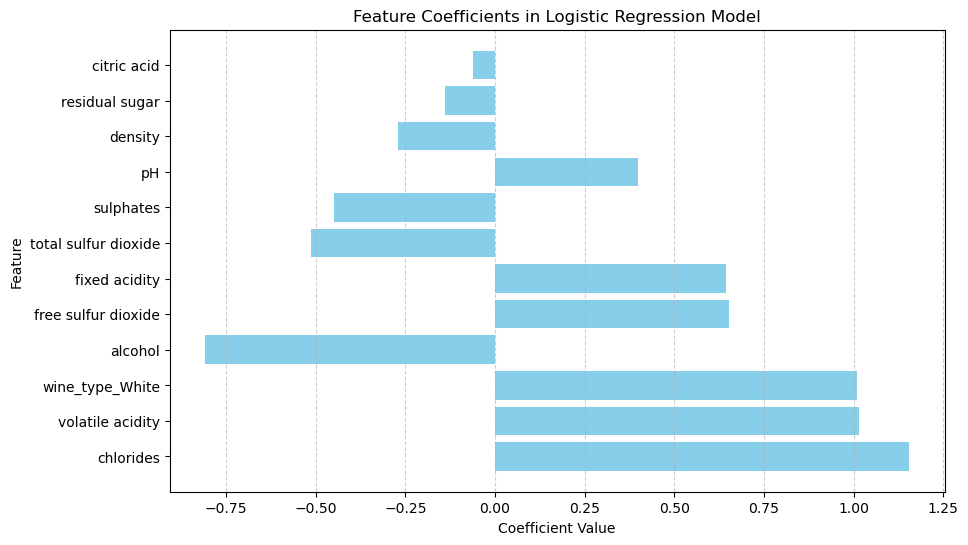

In [77]:
# Create a bar plot of feature coefficients
plt.figure(figsize=(10, 6))
plt.barh(sorted_coef_df['Feature'], sorted_coef_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Coefficients in Logistic Regression Model')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Display the plot
plt.show()
